# RRHH

A partir del Data Set creado por Drs. Rich Huebner y Carla Patalano se va a plantear una Red Neuronal que trate de predecir si un empleado renunciará o se quedará en la empresa.

Acompañando a esto se hará un análisis descriptivo de las conclusiones llegadas.

Para trabajar con estos datos tendremos en cuenta que la fecha actual es 01/01/2020


### LINKs
`Dataset` https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data

`Versiones` https://rpubs.com/rhuebner

### Diccionario de Datos

| Variable                  | Característica            | Descripción                                                            | Tipo de Datos |
|---------------------------|---------------------------|------------------------------------------------------------------------|---------------|
| Employee Name             | Nombre del Empleado       | Nombre completo del empleado                                           | Texto         |
| EmpID                     | ID del Empleado           | El ID del empleado es único para cada empleado                         | Texto         |
| MarriedID                 | CasadoID                  | ¿Está casada la persona? (1 o 0 para sí o no)                          | Binario       |
| MaritalStatusID           | ID del Estado Civil       | Código de estado civil que coincide con el campo de texto MaritalDesc  | Entero        |
| EmpStatusID               | ID del Estado de Empleo   | Código de estado de empleo que coincide con el campo de texto EmploymentStatus | Entero  |
| DeptID                    | ID del Departamento       | Código de ID del departamento que coincide con el departamento en el que trabaja el empleado | Entero |
| PerfScoreID               | ID del Rendimiento       | Código de rendimiento que coincide con el rendimiento más reciente del empleado | Entero    |
| FromDiversityJobFairID    | DesdeDiversityJobFairID   | ¿Fue el empleado reclutado en la feria laboral de la diversidad? 1 o 0 para sí o no | Binario |
| Salary                    | Salario                   | El salario anual de la persona. $ Dólares estadounidenses             | Flotante      |
| Termd                     | Terminado                 | ¿Se ha terminado este empleado? - 1 o 0                                | Binario       |
| PositionID                | ID del Puesto             | Un número entero que indica el puesto de la persona                    | Entero        |
| Position                  | Puesto                    | El nombre/título del puesto que tiene la persona                       | Texto         |
| State                     | Estado                    | El estado en el que vive la persona                                    | Texto         |
| Zip                       | Código Postal             | El código postal del empleado                                          | Texto         |
| DOB                       | Fecha de Nacimiento       | Fecha de nacimiento del empleado                                       | Fecha         |
| Sex                       | Sexo                      | Sexo - M o F                                                           | Texto         |
| MaritalDesc               | Estado Civil              | El estado civil de la persona (divorciado, soltero, viudo, separado, etc.) | Texto     |
| CitizenDesc               | Descripción de Ciudadanía | Etiqueta para indicar si la persona es ciudadana o no ciudadana elegible | Texto         |
| HispanicLatino            | HispanoLatino             | Campo de Sí o No para indicar si el empleado es Hispano/Latino         | Texto         |
| RaceDesc                  | Descripción de Raza       | Descripción/texto de la raza con la que se identifica la persona        | Texto         |
| DateofHire                | Fecha de Contratación     | Fecha en que la persona fue contratada                                 | Fecha         |
| DateofTermination         | Fecha de Terminación      | Fecha en que la persona fue terminada, solo poblada si, de hecho, Termd = 1 | Fecha    |
| TermReason                | Motivo de Terminación     | Un motivo/descripción de texto por el cual se terminó a la persona     | Texto         |
| EmploymentStatus          | Estado de Empleo          | Una descripción/categoría del estado de empleo de la persona. Cualquier persona que trabaje a tiempo completo = Activo | Texto |
| Department                | Departamento              | Nombre del departamento en el que trabaja la persona                    | Texto         |
| ManagerName               | Nombre del Gerente        | El nombre del gerente inmediato de la persona                          | Texto         |
| ManagerID                 | ID del Gerente            | Un identificador único para cada gerente                                | Entero        |
| RecruitmentSource         | Fuente de Reclutamiento   | El nombre de la fuente de reclutamiento de donde se reclutó al empleado | Texto        |
| PerformanceScore          | Puntuación de Rendimiento | Texto/categoría de puntuación de rendimiento (Cumple totalmente, Cumple parcialmente, PIP, Excede) | Texto |
| EngagementSurvey          | Encuesta de Compromiso    | Resultados de la última encuesta de compromiso, gestionada por nuestro socio externo | Flotante |
| EmpSatisfaction           | Satisfacción del Empleado | Una puntuación básica de satisfacción entre 1 y 5, según lo informado en una reciente encuesta de satisfacción del empleado | Entero |
| SpecialProjectsCount      | Cantidad de Proyectos Especiales | La cantidad de proyectos especiales en los que trabajó el empleado durante los últimos 6 meses | Entero |
| LastPerformanceReviewDate | Fecha de la Última Revisión de Rendimiento | La fecha más reciente de la última revisión de rendimiento de la persona | Fecha |
| DaysLateLast30            | Días de Retraso en los Últimos 30 Días | El número de veces que el empleado llegó tarde al trabajo durante los últimos 30 días | Entero |
| Absences                  | Ausencias                 | El número de veces que el empleado estuvo ausente del trabajo           | Entero       |


## Importar Datos

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

/var/folders/8h/gmz73zy52mbcbh56_3bg1qr40000gn/T/ipykernel_4882/207423726.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import chardet

def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])

In [3]:
path = 'HRDataset_v14.csv'
data_original = open_file(path)

In [4]:
data_original

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


## 
Análisis de los Datos

### Columnas sin aportes

Antes que nada se tendrán que descartar las columnas que no nos aporten información para la generación de un modelos:
- Employee_Name
- EmpID
- MarriedID
- Zip
- EmpStatusID
- State
- RecruitmentSource

### Columnas con información adicional

Aquellas columnas que no nos brindan información pero si nos interesan para una parte más analítica de los datos.
- TermReason
- EmploymentStatus

### Columnas informativas y su ID

Algunas de estas columnas muestran la misma información, solo que algunas describen que trata y otras solo son su ID.

| Descripción                  | ID            |
|---------------------------|---------------------------|
|MaritalDesc|MaritalStatusID|
|Sex|GenderID|
|EmploymentStatus|EmpStatusID|
|Position|PositionID|
|ManagerName|ManagerID|
|PerformanceScore|PerfScoreID|


In [5]:
### Eliminamos las columnas que no nos interesan
data = data_original.copy()
    
# Eliminar las columnas especificadas
columnas_a_eliminar = ['Employee_Name', 'EmpID', 'MarriedID', 'Zip','TermReason','EmploymentStatus', 'EmpStatusID', 'State', 'RecruitmentSource']
data = data.drop(columnas_a_eliminar, axis=1)

In [6]:
data

,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,DOB,...,Department,ManagerName,ManagerID,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,1,5,4,0,62506,0,19,Production Technician I,07/10/83,...,Production,Michael Albert,22.0,Exceeds,4.60,5,0,1/17/2019,0,1
1,1,1,3,3,0,104437,1,27,Sr. DBA,05/05/75,...,IT/IS,Simon Roup,4.0,Fully Meets,4.96,3,6,2/24/2016,0,17
2,1,0,5,3,0,64955,1,20,Production Technician II,09/19/88,...,Production,Kissy Sullivan,20.0,Fully Meets,3.02,3,0,5/15/2012,0,3
3,1,0,5,3,0,64991,0,19,Production Technician I,09/27/88,...,Production,Elijiah Gray,16.0,Fully Meets,4.84,5,0,1/3/2019,0,15
4,2,0,5,3,0,50825,1,19,Production Technician I,09/08/89,...,Production,Webster Butler,39.0,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,5,3,0,65893,0,20,Production Technician II,05/11/85,...,Production,Kissy Sullivan,20.0,Fully Meets,4.07,4,0,2/28/2019,0,13
307,0,0,5,1,0,48513,1,19,Production Technician I,05/04/82,...,Production,Brannon Miller,12.0,PIP,3.20,2,0,9/2/2015,5,4
308,0,0,3,4,0,220450,0,6,CIO,08/30/79,...,IT/IS,Janet King,2.0,Exceeds,4.60,5,6,2/21/2019,0,16
309,0,0,3,3,0,89292,0,9,Data Analyst,02/24/79,...,IT/IS,Simon Roup,4.0,Fully Meets,5.00,3,5,2/1/2019,0,11


### Rango de los datos (numéricos)

/var/folders/8h/gmz73zy52mbcbh56_3bg1qr40000gn/T/ipykernel_4882/4040435278.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=axes)


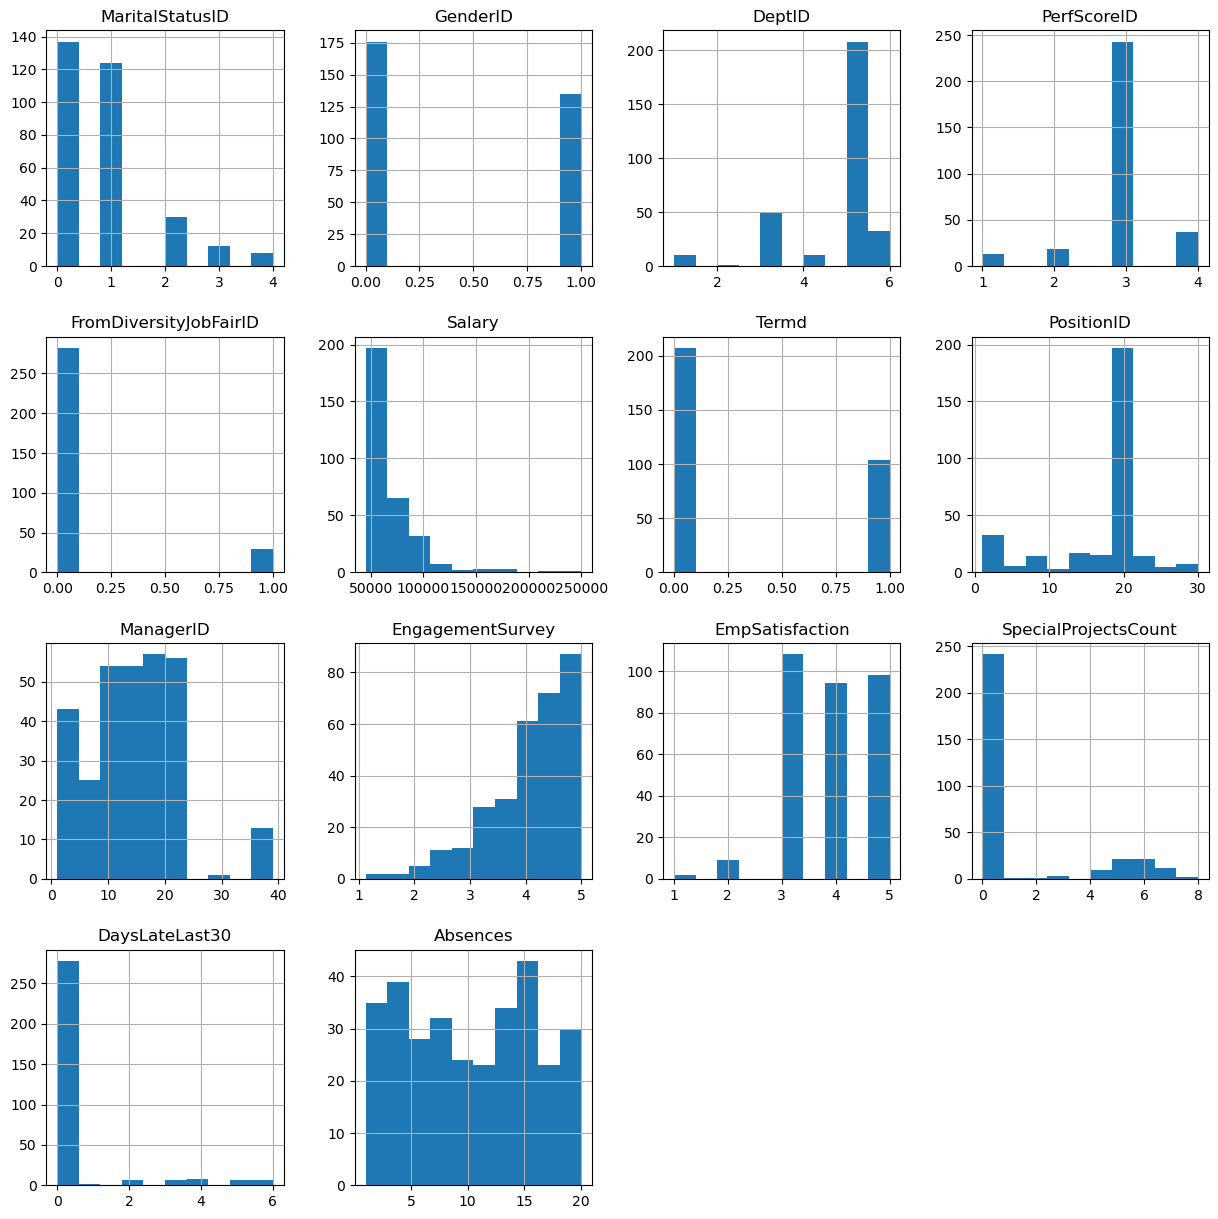

In [7]:
import matplotlib.pyplot as plt

# Crear una figura y ejes explícitamente
fig, axes = plt.subplots(figsize=(15, 15))
data.hist(ax=axes)
plt.show()


Observaciones
- Datos los tenemos desbalanceados, puesto que la columna Termd muestra que solo 1/3 de los datos son de ex empleados.

In [8]:
# Buscar casillas Nulas
print(data.isnull().any())

MaritalStatusID               False
GenderID                      False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
Department                    False
ManagerName                   False
ManagerID                      True
PerformanceScore              False
EngagementSurvey              False
EmpSatisfaction               False
SpecialProjectsCount          False
LastPerformanceReview_Date    False
DaysLateLast30                False
Absences                      False
dtype: bool


*Vemos que ManagerID cuenta con valores Nulos, así que los pasamos a 0 para tener un mejor manejo en futuro*

In [9]:
data['ManagerID'] = data['ManagerID'].fillna(0)

In [10]:
### Generar diccionario de columnas descriptivas y su ID

import json

def generar_diccionarios(data):
    diccionarios = {}

    # Iterar sobre las relaciones de ID y descripción
    relaciones = [
        ('MaritalDesc', 'MaritalStatusID'),
        ('Sex', 'GenderID'),
        #('EmploymentStatus', 'EmpStatusID'),
        ('Position', 'PositionID'),
        ('ManagerName', 'ManagerID'),
        ('PerformanceScore', 'PerfScoreID')
    ]

    for descripcion, id_columna in relaciones:
        # Crear un DataFrame con las columnas relevantes
        df_relacion = data[[descripcion, id_columna]].drop_duplicates().reset_index(drop=True)
        # Convertir el DataFrame en un diccionario
        diccionario = df_relacion.set_index(id_columna)[descripcion].to_dict()
        diccionarios[descripcion] = diccionario
    return diccionarios

def imprimir_diccionarios(diccionarios_valores):
    # Imprimir ordenado e identado
    for key, value in sorted(diccionarios_valores.items()):
        print(key + ":")
        sorted_values = {str(k): v for k, v in sorted(value.items())}
        print(json.dumps(sorted_values, indent=4))


diccionarios_valores = generar_diccionarios(data.copy())
imprimir_diccionarios(diccionarios_valores)

ManagerName:
{
    "0.0": "Webster Butler",
    "1.0": "Brandon R. LeBlanc",
    "2.0": "Janet King",
    "3.0": "Brandon R. LeBlanc",
    "4.0": "Simon Roup",
    "5.0": "Jennifer Zamora",
    "6.0": "Eric Dougall",
    "7.0": "Peter Monroe",
    "9.0": "Board of Directors",
    "10.0": "Alex Sweetwater",
    "11.0": "Amy Dunn",
    "12.0": "Brannon Miller",
    "13.0": "Brian Champaigne",
    "14.0": "David Stanley",
    "15.0": "Debra Houlihan",
    "16.0": "Elijiah Gray",
    "17.0": "John Smith",
    "18.0": "Kelley Spirea",
    "19.0": "Ketsia Liebig",
    "20.0": "Kissy Sullivan",
    "21.0": "Lynn Daneault",
    "22.0": "Michael Albert",
    "30.0": "Michael Albert",
    "39.0": "Webster Butler"
}
MaritalDesc:
{
    "0": "Single",
    "1": "Married",
    "2": "Divorced",
    "3": "Separated",
    "4": "Widowed"
}
PerformanceScore:
{
    "1": "PIP",
    "2": "Needs Improvement",
    "3": "PIP",
    "4": "Exceeds"
}
Position:
{
    "1": "Accountant I",
    "2": "Administrative As

## Variables Descriptivas y ID

1. **Cantidad de categorías únicas:** Si la columna de descripción tiene muchas categorías únicas, aplicar One-Hot Encoding podría generar un número significativo de nuevas columnas, aumentando la dimensionalidad y complejidad del modelo. En estos casos, normalizar el ID podría ser más eficiente.

2. **Interpretación de los datos:** Si la descripción de cada categoría es importante y tiene algún significado semántico relevante, aplicar One-Hot Encoding preservaría esta información en el modelo. Normalizar el ID podría perder esta información.

3. **Eficiencia computacional:** One-Hot Encoding puede ser más costoso computacionalmente, especialmente con muchas categorías únicas y un conjunto de datos grande. Normalizar el ID puede reducir la carga computacional, ya que solo se necesita una columna adicional para representar la información.

4. **Rendimiento del modelo:** La elección entre normalizar el ID y aplicar One-Hot Encoding puede afectar el rendimiento del modelo. Se pueden probar ambas opciones y evaluar cómo afectan el rendimiento del modelo utilizando técnicas de validación cruzada u otras metodologías de evaluación.

5. **Interpretación semántica:** Si la distinción entre géneros ("M" para masculino y "F" para femenino) es importante y relevante para tu problema, generar One-Hot Encoding con el campo "Sex" sería preferible. Esto preservaría la información sobre el género en el modelo y permitiría una interpretación más clara de los resultados.

6. **Normalización:** En el caso de campos discretos como "GenderID", la normalización no sería necesaria, ya que los valores están en una escala discreta y no numérica. La normalización se aplica generalmente a características numéricas para estandarizar su rango y evitar que una característica tenga un peso desproporcionado en el modelo debido a su escala.

En resumen, la elección entre normalizar el ID y aplicar One-Hot Encoding depende del contexto específico de tus datos y del problema que estés abordando. Debes considerar la cantidad de categorías únicas, la interpretación de los datos, la eficiencia computacional y el rendimiento del modelo al tomar esta decisión.


Si tienes un campo en tu tabla con 30 datos nominales y deseas aplicarlo para machine learning, como mencionaste, una opción común sería utilizar One-Hot Encoding. Sin embargo, es cierto que con 30 categorías únicas, esto generaría 30 nuevas columnas en tu conjunto de datos, lo que aumentaría la dimensionalidad y podría introducir problemas de eficiencia computacional y de rendimiento del modelo.

Aquí hay algunas alternativas a considerar:

1. **Reducir el número de categorías:** Si es posible, podrías agrupar las categorías similares en grupos más amplios. Por ejemplo, si tienes una categoría para cada país del mundo, podrías agruparlos por continentes o regiones. Esto reduciría el número de categorías únicas y simplificaría el problema.

2. **Codificación de frecuencia:** En lugar de aplicar One-Hot Encoding, podrías codificar cada categoría con su frecuencia de aparición en los datos. Esto implica reemplazar cada categoría con el número de veces que aparece en el conjunto de datos. Esta codificación puede ser útil si la frecuencia de las categorías es informativa para tu problema.

3. **Codificación de frecuencia relativa:** Similar a la codificación de frecuencia, podrías codificar cada categoría con su frecuencia relativa en lugar de su frecuencia absoluta. Esto implica reemplazar cada categoría con la proporción de veces que aparece en el conjunto de datos en relación con el número total de observaciones.

4. **Codificación de target promedio:** Si tienes una variable objetivo en tus datos, podrías codificar cada categoría con la media (o cualquier otra estadística) de la variable objetivo para esa categoría. Esto implica reemplazar cada categoría con el valor promedio de la variable objetivo para las observaciones asociadas con esa categoría.

5. **Uso de embeddings:** Si estás trabajando con conjuntos de datos grandes y complejos, especialmente en el contexto de modelos de aprendizaje profundo, podrías considerar el uso de embeddings para representar las categorías de manera más compacta y significativa.



In [11]:
no_modificar  = ['GenderID', 'MaritalStatusID']
num_to_binari = ['PositionID', 'ManagerID', 'PerfScoreID']
eliminar      = ['MaritalDesc', 'Sex', 'Position', 'ManagerName','PerformanceScore', 'Department']

data = data.drop(eliminar, axis=1)
data

,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,DOB,CitizenDesc,...,RaceDesc,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,1,5,4,0,62506,0,19,07/10/83,US Citizen,...,White,7/5/2011,NaN,22.0,4.60,5,0,1/17/2019,0,1
1,1,1,3,3,0,104437,1,27,05/05/75,US Citizen,...,White,3/30/2015,6/16/2016,4.0,4.96,3,6,2/24/2016,0,17
2,1,0,5,3,0,64955,1,20,09/19/88,US Citizen,...,White,7/5/2011,9/24/2012,20.0,3.02,3,0,5/15/2012,0,3
3,1,0,5,3,0,64991,0,19,09/27/88,US Citizen,...,White,1/7/2008,NaN,16.0,4.84,5,0,1/3/2019,0,15
4,2,0,5,3,0,50825,1,19,09/08/89,US Citizen,...,White,7/11/2011,9/6/2016,39.0,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,5,3,0,65893,0,20,05/11/85,US Citizen,...,White,7/7/2014,NaN,20.0,4.07,4,0,2/28/2019,0,13
307,0,0,5,1,0,48513,1,19,05/04/82,US Citizen,...,Asian,9/2/2008,9/29/2015,12.0,3.20,2,0,9/2/2015,5,4
308,0,0,3,4,0,220450,0,6,08/30/79,US Citizen,...,White,4/10/2010,NaN,2.0,4.60,5,6,2/21/2019,0,16
309,0,0,3,3,0,89292,0,9,02/24/79,US Citizen,...,White,3/30/2015,NaN,4.0,5.00,3,5,2/1/2019,0,11


In [12]:
fecha_actual = '01/01/2020'

In [13]:
def calcular_edades(data, fecha_actual_str):
    # Convertir la cadena de fecha actual a formato de fecha
    fecha_actual = pd.to_datetime(fecha_actual_str, format='%d/%m/%Y')

    # Calcular la edad en base a la fecha actual y la fecha de nacimiento (DOB)
    data['edad'] = ((fecha_actual - pd.to_datetime(data['DOB'])).dt.days / 365).astype(int)

    # Calcular la diferencia de edad entre la fecha de contratación (DateofHire) y la fecha de nacimiento (DOB)
    data['edad_contratacion'] = ((pd.to_datetime(data['DateofHire']) - pd.to_datetime(data['DOB'])).dt.days / 365).astype(int)

    
    return data

# Aplicar la función al DataFrame
data = calcular_edades(data, fecha_actual)

eliminar = ['DOB', 'DateofHire']
data = data.drop(eliminar, axis=1)


/var/folders/8h/gmz73zy52mbcbh56_3bg1qr40000gn/T/ipykernel_4882/1204440507.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['edad'] = ((fecha_actual - pd.to_datetime(data['DOB'])).dt.days / 365).astype(int)
/var/folders/8h/gmz73zy52mbcbh56_3bg1qr40000gn/T/ipykernel_4882/1204440507.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['edad_contratacion'] = ((pd.to_datetime(data['DateofHire']) - pd.to_datetime(data['DOB'])).dt.days / 365).astype(int)


In [14]:
def calcular_dias_desde_ultima_revision(data, fecha_actual):
    # Reemplazar los valores nulos en la columna DateofTermination con '01/01/2020'
    data['DateofTermination'] = data['DateofTermination'].fillna(fecha_actual)

    # Convertir las columnas a formato de fecha
    data['LastPerformanceReview_Date'] = pd.to_datetime(data['LastPerformanceReview_Date'])
    data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])

    # Calcular la diferencia en días entre LastPerformanceReview_Date y DateofTermination
    data['days_last_revision'] = (data['DateofTermination'] - data['LastPerformanceReview_Date']).dt.days

    return data

# Aplicar la función al DataFrame
data = calcular_dias_desde_ultima_revision(data, fecha_actual)

eliminar = ['DateofTermination', 'LastPerformanceReview_Date']
data = data.drop(eliminar, axis=1)


In [15]:
data['days_last_revision']

0      349
1      113
2      132
3      363
4      218
      ... 
306    307
307     27
308    314
309    334
310    336
Name: days_last_revision, Length: 311, dtype: int64

In [23]:
def reemplazar_valores_ciudad(data):
    mapeo = {'Non-Citizen': 0, 'Eligible NonCitizen': 1, 'US Citizen': 2}
    data['CitizenDesc'] = data['CitizenDesc'].replace(mapeo)
    return data
    
def reemplazar_valores_hispano(data):
    mapeo = {'No': 0, 'Yes': 1}
    data['HispanicLatino'] = data['HispanicLatino'].replace(mapeo)
    return data
data = reemplazar_valores_ciudad(data)
data = reemplazar_valores_hispano(data)

In [24]:
data['HispanicLatino']

0      0
1      0
2      0
3      0
4      0
      ..
306    0
307    0
308    0
309    0
310    0
Name: HispanicLatino, Length: 311, dtype: object

In [26]:
data

,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,CitizenDesc,HispanicLatino,RaceDesc,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,edad,edad_contratacion,days_last_revision
0,0,1,5,4,0,62506,0,19,2,0,White,22.0,4.60,5,0,0,1,36,28,349
1,1,1,3,3,0,104437,1,27,2,0,White,4.0,4.96,3,6,0,17,44,39,113
2,1,0,5,3,0,64955,1,20,2,0,White,20.0,3.02,3,0,0,3,31,22,132
3,1,0,5,3,0,64991,0,19,2,0,White,16.0,4.84,5,0,0,15,31,19,363
4,2,0,5,3,0,50825,1,19,2,0,White,39.0,5.00,4,0,0,2,30,21,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,5,3,0,65893,0,20,2,0,White,20.0,4.07,4,0,0,13,34,29,307
307,0,0,5,1,0,48513,1,19,2,0,Asian,12.0,3.20,2,0,5,4,37,26,27
308,0,0,3,4,0,220450,0,6,2,0,White,2.0,4.60,5,6,0,16,40,30,314
309,0,0,3,3,0,89292,0,9,2,0,White,4.0,5.00,3,5,0,11,40,36,334
